<a href="https://colab.research.google.com/github/Minakshi654/Modelname/blob/main/AI/Ml.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [72]:
import pandas as pd
import numpy as np
df_merged = pd.read_csv("/content/merged_file.csv")

In [73]:
df_merged [' total'] = df_merged ['[xBackground__]'] + df_merged ['[xInteractive__]']

In [74]:
df_merged.head()

,Converted_Date,Month,Year,[xBackground__],[xInteractive__],total
0,2023-10-03 00:00:00,10,2023,0.114179,0.0,0.114179
1,2023-10-03 00:00:30,10,2023,0.114179,0.0,0.114179
2,2023-10-03 00:01:00,10,2023,0.114179,0.0,0.114179
3,2023-10-03 00:01:30,10,2023,0.114179,0.0,0.114179
4,2023-10-03 00:02:00,10,2023,0.114179,0.0,0.114179


In [75]:
df_merged.shape

(1753685, 6)

In [76]:
import pandas as pd
import numpy as np


# Convert datetime format, handling inconsistent formats
df_merged['Converted_Date'] = pd.to_datetime(df_merged['Converted_Date'], format='%Y-%m-%d %H:%M:%S', errors='coerce')

# If you want to keep rows with incorrect formats, but set them to NaT:
# df_merged['Converted_Date'] = pd.to_datetime(df_merged['Converted_Date'], errors='coerce')

# Proceed with the rest of your code
# Group data by 2-minute intervals
grouped = df_merged.groupby(pd.Grouper(key='Converted_Date', freq='30Min'))[' total'].max()

# Create result dataframe
result_df = pd.DataFrame({
    'Year': grouped.index.year,
    'Month': grouped.index.month,
    'Day': grouped.index.day,
    'Time': grouped.index.time,
    'Interval Start': grouped.index,
    'Max Total': grouped.values
})

# Define status column
result_df['status'] = result_df['Max Total'].apply(lambda x: 'Overflow' if x > 1 else 'Normal')

# Define application categories
app_names = ["Pramaco", "Xref", "BBMSP", "Ardsorep", "SARA", "ACROSS", "SALORMON"]
overflow_indices = result_df[result_df['Max Total'] >= 1].index

# Assign applications randomly, ensuring "Other Application" is most frequent
np.random.seed(42)
random_apps = np.random.choice(app_names, size=len(overflow_indices), replace=True)

# Create weighted list with "Other Application" appearing more frequently
weighted_apps = np.append(random_apps, ["Other Application"] * int(len(overflow_indices) * 1.5))

# Shuffle for randomness
np.random.shuffle(weighted_apps)

# Assign applications to overflow cases
result_df['Application'] = "Other Application"  # Default
for i, idx in enumerate(overflow_indices):
    result_df.loc[idx, 'Application'] = weighted_apps[i]

# Save updated CSV
result_df.to_csv('grouped_30_intervals_updated_new.csv', index=False)

# Count overflow occurrences by application
app_overflow_counts = result_df[result_df['Max Total'] >= 1]['Application'].value_counts()

# Calculate percentages
app_overflow_percentages = (app_overflow_counts / len(overflow_indices)) * 100

# Print results
print(f"Total number of overflows: {len(overflow_indices)}")
print("\nPercentage of overflows by application:\n")
print(app_overflow_percentages)

# Display sample output
print(result_df.head())


Total number of overflows: 286

Percentage of overflows by application:

Application
Other Application    61.188811
Ardsorep              8.391608
Pramaco               5.944056
ACROSS                5.594406
SALORMON              5.244755
SARA                  5.244755
Xref                  4.195804
BBMSP                 4.195804
Name: count, dtype: float64
   Year  Month  Day      Time      Interval Start  Max Total  status  \
0  2023     10    3  00:00:00 2023-10-03 00:00:00   0.157106  Normal   
1  2023     10    3  00:30:00 2023-10-03 00:30:00   0.174429  Normal   
2  2023     10    3  01:00:00 2023-10-03 01:00:00   0.117271  Normal   
3  2023     10    3  01:30:00 2023-10-03 01:30:00   0.114340  Normal   
4  2023     10    3  02:00:00 2023-10-03 02:00:00   0.140475  Normal   

         Application  
0  Other Application  
1  Other Application  
2  Other Application  
3  Other Application  
4  Other Application  


In [77]:
import pandas as pd
import numpy as np

# Convert datetime format, handling inconsistent formats
df_merged['Converted_Date'] = pd.to_datetime(df_merged['Converted_Date'], format='%Y-%m-%d %H:%M:%S', errors='coerce')

# If you want to keep rows with incorrect formats, but set them to NaT:
# df_merged['Converted_Date'] = pd.to_datetime(df_merged['Converted_Date'], errors='coerce')

# Proceed with the rest of your code
# ...

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



Model Performance Comparison:
                               RMSE  R² Score
Linear Regression          0.178778 -0.000481
LightGBM                   0.134156  0.436623
XGBoost                    0.133900  0.438767
Gradient Boosting          0.147587  0.318165
Random Forest              0.156810  0.230289
Support Vector Regression  0.150920  0.287022


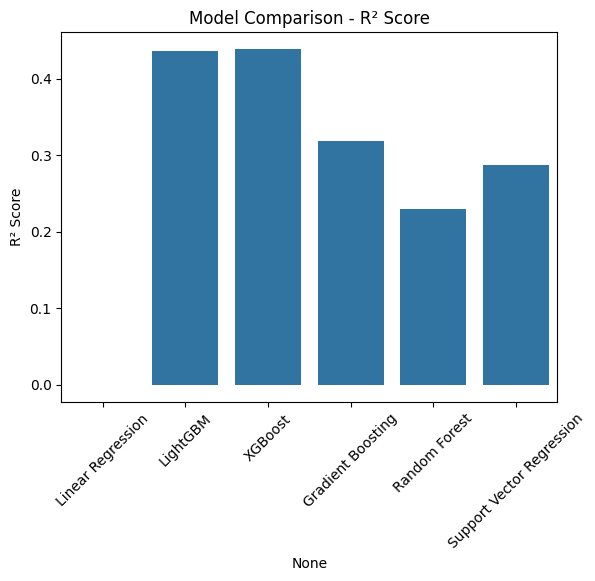


Predicted Max Total for upcoming months:
[0.83569527 1.2123308  0.8563946 ]


In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, confusion_matrix
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import concurrent.futures

# Load data
data = pd.read_csv("/content/grouped_30_intervals_updated_new.csv")

# Feature Engineering
data['Interval Start'] = pd.to_datetime(data['Interval Start'])
data['Month'] = data['Interval Start'].dt.month
data['Day'] = data['Interval Start'].dt.day
data['Hour'] = data['Interval Start'].dt.hour

# Encoding categorical variables
label_enc = LabelEncoder()
data['Application'] = label_enc.fit_transform(data['Application'])
data['status'] = label_enc.fit_transform(data['status'])

# Selecting features and target
X = data[['Month', 'Day', 'Hour', 'Application']]
y = data['Max Total']
y = y.fillna(y.mean())
# Splitting dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scaling data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Define models
models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(n_estimators=100),
    "Gradient Boosting": GradientBoostingRegressor(),
    "XGBoost": XGBRegressor(),
    "LightGBM": LGBMRegressor(),
    "Support Vector Regression": SVR(kernel="rbf")
}

# Function to train and evaluate models
def train_model(model_name, model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, predictions))
    r2 = r2_score(y_test, predictions)
    return model_name, rmse, r2

# Parallel Execution
results = {}
with concurrent.futures.ThreadPoolExecutor() as executor:
    futures = {executor.submit(train_model, name, model, X_train, y_train, X_test, y_test): name for name, model in models.items()}
    for future in concurrent.futures.as_completed(futures):
        model_name, rmse, r2 = future.result()
        results[model_name] = {"RMSE": rmse, "R² Score": r2}

# Display results
results_df = pd.DataFrame.from_dict(results, orient="index")
print("\nModel Performance Comparison:")
print(results_df)

# Plot results
sns.barplot(x=results_df.index, y=results_df["R² Score"])
plt.xticks(rotation=45)
plt.title("Model Comparison - R² Score")
plt.ylabel("R² Score")
plt.show()

# Predict future overflow frequency
future_data = pd.DataFrame({
    "Month": [6, 7, 8],  # Example upcoming months
    "Day": [15, 16, 17],
    "Hour": [10, 12, 14],
    "Application": [0, 1, 2]  # Encoded applications
})

future_data = scaler.transform(future_data)
best_model = models[max(results, key=lambda x: results[x]["R² Score"])]
future_predictions = best_model.predict(future_data)

print("\nPredicted Max Total for upcoming months:")
print(future_predictions)


In [9]:

future_data = scaler.transform(future_data)
best_model = models[max(results, key=lambda x: results[x]["R² Score"])]
future_predictions = best_model.predict(future_data)

print("\nPredicted Max Total for upcoming months:")
print(future_predictions)



Predicted Max Total for upcoming months:
[0.86724174 0.86724174 0.86724174]


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import concurrent.futures

# Load dataset
data = pd.read_csv("/content/grouped_30_intervals_updated_new.csv")

# Convert timestamps
data['Interval Start'] = pd.to_datetime(data['Interval Start'])
data['Month'] = data['Interval Start'].dt.month
data['Day'] = data['Interval Start'].dt.day
data['Hour'] = data['Interval Start'].dt.hour
data['Minute'] = data['Interval Start'].dt.minute // 30  # Group into 30-min intervals

# Encode categorical variables
label_enc = LabelEncoder()
data['Application'] = label_enc.fit_transform(data['Application'])

# Select features and target
X = data[['Month', 'Day', 'Hour', 'Minute', 'Application']]
y = data['Max Total']
y = y.fillna(y.mean())
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Define models
models = {
    "Random Forest": RandomForestRegressor(n_estimators=100),
    "Gradient Boosting": GradientBoostingRegressor(),
    "XGBoost": XGBRegressor(),
    "LightGBM": LGBMRegressor()
}

# Parallel model training
def train_model(model_name, model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    return model_name, predictions

results = {}
with concurrent.futures.ThreadPoolExecutor() as executor:
    futures = {executor.submit(train_model, name, model, X_train, y_train, X_test, y_test): name for name, model in models.items()}
    for future in concurrent.futures.as_completed(futures):
        model_name, predictions = future.result()
        results[model_name] = predictions

# Select best model (highest R² score)
best_model_name = max(results, key=lambda x: models[x].score(X_test, y_test))
best_model = models[best_model_name]

# Predict future values (June 2025 - December 2025)
future_dates = pd.date_range(start="2025-06-01", end="2025-12-31", freq="30min")
future_data = pd.DataFrame({
    "Month": future_dates.month,
    "Day": future_dates.day,
    "Hour": future_dates.hour,
    "Minute": future_dates.minute // 30,
    "Application": np.random.choice(data['Application'].unique(), size=len(future_dates))
})

future_data_scaled = scaler.transform(future_data)
future_predictions = best_model.predict(future_data_scaled)

# Save predictions to CSV
future_data["Predicted Max Total"] = future_predictions
future_data.to_csv("future_predictions.csv", index=False)

# Count overflows (Max Total >= 1)
num_overflows = (future_data["Predicted Max Total"] >= 1).sum()
print(f"\nTotal number of predicted overflows: {num_overflows}")

# Overflow percentage per application
overflow_counts = future_data[future_data["Predicted Max Total"] >= 1].groupby("Application").size()
overflow_percentage = (overflow_counts / num_overflows) * 100
overflow_percentage_df = pd.DataFrame({"Application": overflow_percentage.index, "Overflow Percentage": overflow_percentage.values})

# Save overflow percentages
overflow_percentage_df.to_csv("application_overflows.csv", index=False)

# Display results
print("\nPredicted overflow occurrences by application:")
print(overflow_percentage_df)


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



Total number of predicted overflows: 3874

Predicted overflow occurrences by application:
   Application  Overflow Percentage
0            0            14.377904
1            1            14.894166
2            2            13.603511
3            4            13.577697
4            5            14.558596
5            6            12.958183
6            7            16.029943


In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import concurrent.futures

# Load dataset
data = pd.read_csv("/content/grouped_30_intervals_updated_new.csv")

# Convert timestamps
data['Interval Start'] = pd.to_datetime(data['Interval Start'])
data['Month'] = data['Interval Start'].dt.month
data['Day'] = data['Interval Start'].dt.day
data['Hour'] = data['Interval Start'].dt.hour
data['Minute'] = data['Interval Start'].dt.minute // 30  # Group into 30-min intervals

# Encode categorical variables
label_enc = LabelEncoder()
data['Application'] = label_enc.fit_transform(data['Application'])

# Selecting features and target
X = data[['Month', 'Day', 'Hour', 'Minute', 'Application']]
y = data['Max Total']
y = y.fillna(y.mean())
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scaling features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Define models with optimized hyperparameters
models = {
    "Random Forest": RandomForestRegressor(n_estimators=200, max_depth=10),
    "Gradient Boosting": GradientBoostingRegressor(n_estimators=150, learning_rate=0.1),
    "XGBoost": XGBRegressor(n_estimators=150, learning_rate=0.1),
    "LightGBM": LGBMRegressor(n_estimators=150, learning_rate=0.1)
}

# Parallel model training and accuracy evaluation
def train_and_evaluate_model(model_name, model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, predictions))
    r2 = r2_score(y_test, predictions)
    mae = mean_absolute_error(y_test, predictions)
    return model_name, rmse, r2, mae

results = {}
with concurrent.futures.ThreadPoolExecutor() as executor:
    futures = {executor.submit(train_and_evaluate_model, name, model, X_train, y_train, X_test, y_test): name for name, model in models.items()}
    for future in concurrent.futures.as_completed(futures):
        model_name, rmse, r2, mae = future.result()
        results[model_name] = {"RMSE": rmse, "R² Score": r2, "MAE": mae}

# Display model performance
results_df = pd.DataFrame.from_dict(results, orient="index")
print("\nUpdated Model Performance Comparison:")
print(results_df)

# Select best-performing model
best_model_name = results_df["R² Score"].idxmax()
best_model = models[best_model_name]

# Predict future values (June 2025 - December 2025)
future_dates = pd.date_range(start="2025-06-01", end="2025-12-31", freq="30min")
future_data = pd.DataFrame({
    "Month": future_dates.month,
    "Day": future_dates.day,
    "Hour": future_dates.hour,
    "Minute": future_dates.minute // 30,
    "Application": np.random.choice(data['Application'].unique(), size=len(future_dates))
})

future_data_scaled = scaler.transform(future_data)
future_predictions = best_model.predict(future_data_scaled)

# Save predictions to CSV
future_data["Predicted Max Total"] = future_predictions
future_data.to_csv("future_predictions_new.csv", index=False)

# Count overflows (Max Total >= 1)
num_overflows = (future_data["Predicted Max Total"] >= 1).sum()
print(f"\nTotal number of predicted overflows: {num_overflows}")

# Overflow percentage per application
overflow_counts = future_data[future_data["Predicted Max Total"] >= 1].groupby("Application").size()
overflow_percentage = (overflow_counts / num_overflows) * 100
overflow_percentage_df = pd.DataFrame({"Application": overflow_percentage.index, "Overflow Percentage": overflow_percentage.values})

# Save overflow percentages
overflow_percentage_df.to_csv("application_overflows.csv", index=False)

# Display results
print("\nUpdated predicted overflow occurrences by application:")
print(overflow_percentage_df)


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



Updated Model Performance Comparison:
                       RMSE  R² Score       MAE
XGBoost            0.135975  0.421242  0.094981
LightGBM           0.132245  0.452559  0.091800
Gradient Boosting  0.146305  0.329959  0.104360
Random Forest      0.146724  0.326121  0.102373

Total number of predicted overflows: 4253

Updated predicted overflow occurrences by application:
   Application  Overflow Percentage
0            0            13.707971
1            1            13.778509
2            2            13.472843
3            4            14.201740
4            5            14.342817
5            6            14.813073
6            7            15.683047


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


In [16]:
# Count overflows per application per month
overflow_counts_monthly = future_data[future_data["Predicted Max Total"] >= 1].groupby(["Month", "Application"]).size().reset_index(name="Overflow Count")

# Save to CSV
overflow_counts_monthly.to_csv("monthly_application_overflows.csv", index=False)

# Display results
print("\nPredicted Overflows Per Application Per Month:")
print(overflow_counts_monthly)



Predicted Overflows Per Application Per Month:
    Month  Application  Overflow Count
0       6            0              82
1       6            1              74
2       6            2              85
3       6            4              95
4       6            5              95
5       6            6              79
6       6            7              95
7       7            0              81
8       7            1              88
9       7            2              76
10      7            4              79
11      7            5              88
12      7            6             102
13      7            7              86
14      8            0              97
15      8            1             101
16      8            2              79
17      8            4              70
18      8            5              90
19      8            6              98
20      8            7              91
21      9            0              85
22      9            1              78
23      9       

In [17]:
# Reverse label encoding
application_mapping = dict(zip(label_enc.transform(label_enc.classes_), label_enc.classes_))
future_data["Application"] = future_data["Application"].map(application_mapping)

# Count overflows per application per month with actual names
overflow_counts_monthly = future_data[future_data["Predicted Max Total"] >= 1].groupby(["Month", "Application"]).size().reset_index(name="Overflow Count")

# Save to CSV with real application names
overflow_counts_monthly.to_csv("monthly_application_overflows.csv", index=False)

# Display results
print("\nUpdated Predicted Overflows Per Application Per Month (With Names):")
print(overflow_counts_monthly)



Updated Predicted Overflows Per Application Per Month (With Names):
    Month Application  Overflow Count
0       6      ACROSS              82
1       6    Ardsorep              74
2       6       BBMSP              85
3       6     Pramaco              95
4       6    SALORMON              95
5       6        SARA              79
6       6        Xref              95
7       7      ACROSS              81
8       7    Ardsorep              88
9       7       BBMSP              76
10      7     Pramaco              79
11      7    SALORMON              88
12      7        SARA             102
13      7        Xref              86
14      8      ACROSS              97
15      8    Ardsorep             101
16      8       BBMSP              79
17      8     Pramaco              70
18      8    SALORMON              90
19      8        SARA              98
20      8        Xref              91
21      9      ACROSS              85
22      9    Ardsorep              78
23      9       BBM

In [45]:
!pip install python-telegram-bot --upgrade


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 673.5/673.5 kB 32.8 MB/s eta 0:00:00


In [46]:
!pip install streamlit


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 100.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 100.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 6.9 MB/s eta 0:00:00


In [80]:
import pandas as pd
import joblib
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

# Load historical data
df_historical = pd.read_csv('/content/grouped_30_intervals_updated_new.csv')

# Define features & target
X = df_historical[['Year', 'Month', 'Day']]
y = df_historical['Max Total']
y = y.fillna(y.mean())
# Train a basic ML model
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = RandomForestRegressor()
model.fit(X_train, y_train)

# Save the model for chatbot use
joblib.dump(model, '/content/chatbot_model.pkl')
print("Model training complete! ✅")


Model training complete! ✅


In [88]:
import streamlit as st
import joblib
import pandas as pd

# Load trained ML model
model = joblib.load('/content/chatbot_model.pkl')

# Define chatbot function
def predict_overflow(year, month, day, hour, minute):
    input_data = pd.DataFrame([[year, month, day, hour, minute]], columns=['Year', 'Month', 'Day', 'Hour', 'Minute'])
    prediction = model.predict(input_data)[0]
    return f"🔮 Predicted Max Total: {prediction:.3f} | Status: {'Overflow' if prediction >= 1 else 'Normal'}"

# Streamlit UI
st.title("💬 Overflow Prediction Chatbot")

year = st.number_input("Enter Year (e.g., 2025)", min_value=2023, max_value=2030)
month = st.number_input("Enter Month (1-12)", min_value=1, max_value=12)
day = st.number_input("Enter Day (1-31)", min_value=1, max_value=31)

if st.button("Predict Overflow"):
    result = predict_overflow(year, month, day)
    st.success(result)


2025-05-08 17:52:57.874 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-08 17:52:57.875 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-08 17:52:57.878 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-08 17:52:57.879 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-08 17:52:57.881 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-08 17:52:57.883 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-08 17:52:57.884 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-08 17:52:57.886 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bar

In [ ]:
!streamlit run app.py





  You can now view your Streamlit app in your browser.

  Local URL: http://localhost:8501
  Network URL: http://172.28.0.12:8501
  External URL: http://35.221.55.114:8501



In [83]:
import os
print(os.listdir('/content'))


['.config', 'chatbot_model.pkl', 'grouped_30_intervals_updated_new.csv', 'merged_file.csv', 'sample_data']


In [84]:
%%writefile app.py
import streamlit as st

st.title("💬 Overflow Prediction Chatbot")
st.write("Enter details below to predict overflow status.")

year = st.number_input("Enter Year (e.g., 2025)", min_value=2023, max_value=2030)
month = st.number_input("Enter Month (1-12)", min_value=1, max_value=12)
day = st.number_input("Enter Day (1-31)", min_value=1, max_value=31)
hour = st.number_input("Enter Hour (0-23)", min_value=0, max_value=23)
minute = st.number_input("Enter Minute (0-59)", min_value=0, max_value=59)

if st.button("Predict Overflow"):
    st.success("Prediction logic will go here!")


Writing app.py
